# 動的に学習されたフィルターの確認

## セッション情報の保存機能
TensorFlowではトレーニング処理を実施中のセッションの状態をファイルに保存しておくことができる

## 単層CNNによる手書き文字の分類

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(42)
tf.set_random_seed(42)

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [3]:
num_filters = 16

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,num_filters], stddev = 0.1))#畳み込みフィルターの動的な学習
#フィルターサイズ(縦x横) x 入力レイヤー数 x 出力レイヤー数
#stddevオプションで乱数の範囲を指定 +-0.1

h_conv = tf.nn.conv2d(x_image, W_conv, strides = [1,1,1,1], padding='SAME')

h_pool = tf.nn.max_pool(h_conv, ksize = [1,2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#ここではエッジを取り出すことが目的ではなくあくまでも特徴を抽出することが目的なので、絶対値をとる操作は行わない.
#ピクセルの値が負になる可能性があるが、画像の特徴を抽出したデータとしては、意味のあるものになっている。

In [4]:
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*num_filters])

num_units1 = 14*14*num_filters
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1,  num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(var_list={"b0": b0, "w0": w0, "b2": b2, "w2": w2})#jupyter notebookだとrestoreできないので明示的に変数を指定
saver.restore(sess, './mdc_session-4000')

INFO:tensorflow:Restoring parameters from ./mdc_session-4000


In [19]:
filter_vals, conv_vals, pool_vals = sess.run([W_conv, h_conv, h_pool], feed_dict={x:mnist.test.images[:9]})

## 畳み込みフィルターを適用した画像

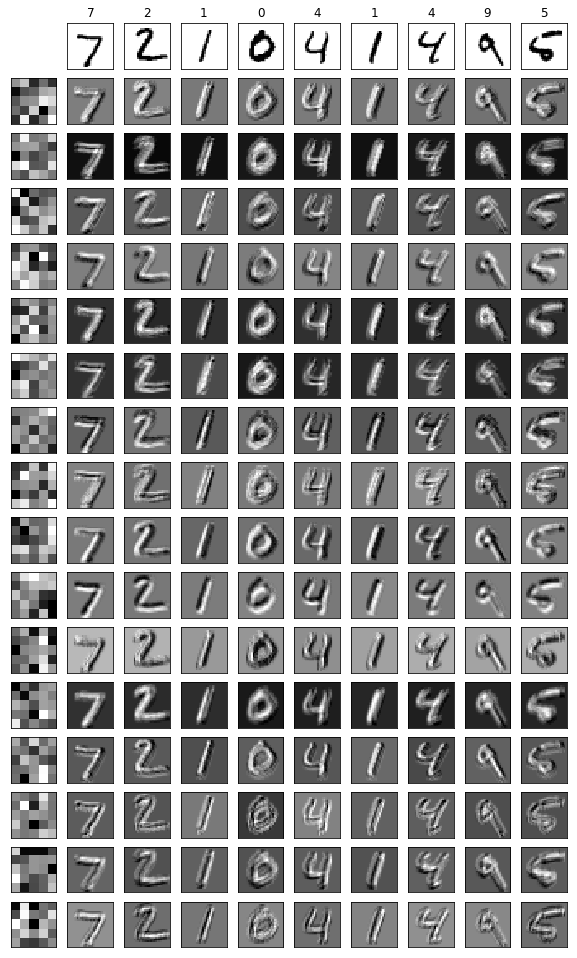

In [26]:
fig = plt.figure(figsize=(10, num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], cmap=plt.cm.gray_r, interpolation='nearest')
    
for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), vmin = 0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters + 1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_vals[i,:,:,f], cmap = plt.cm.gray_r, interpolation='nearest')

## 畳み込みフィルターとプーリング層を適用した画像

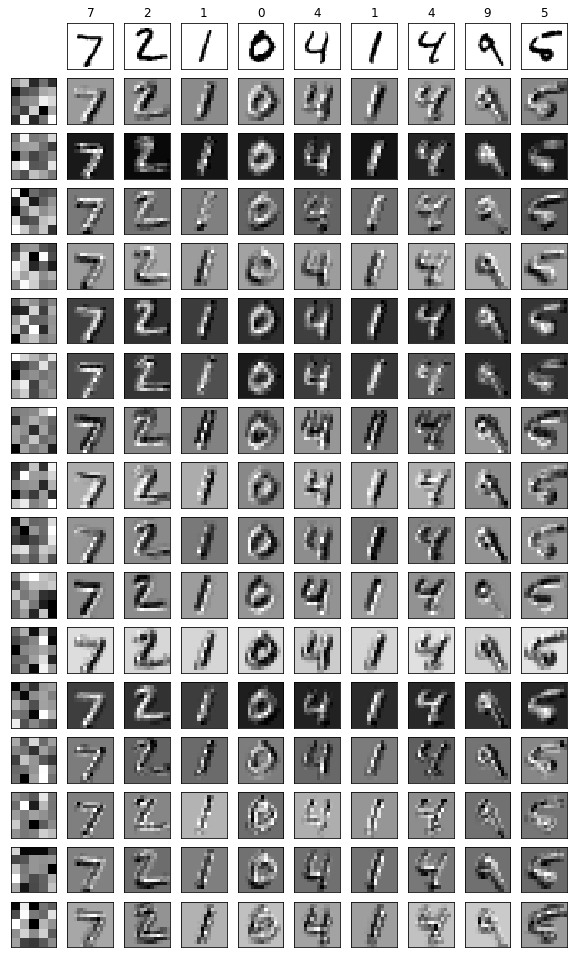

In [27]:
fig = plt.figure(figsize=(10, num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], cmap=plt.cm.gray_r, interpolation='nearest')
    
for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), vmin = 0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters + 1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_vals[i,:,:,f], cmap = plt.cm.gray_r, interpolation='nearest')